## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

In [2]:
df = pd.read_csv("data/cars.csv")
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


## Distribution of brands

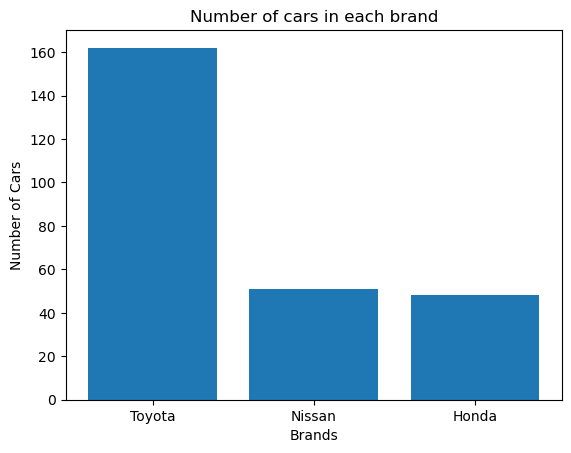

In [3]:
df["brand"] = df["brand"].str.strip()
brands = df["brand"].value_counts()
plt.bar(x=brands.index, height=brands.values);
plt.xlabel("Brands")
plt.ylabel("Number of Cars")
plt.title("Number of cars in each brand")
plt.show()

## Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


It seems that we don't have null values!

We try to convert the dtype of "cubicinches" and "weightlbs" to integer, but following errors had been raised:

In [5]:
# df["cubicinches"].astype("int")
## ValueError: invalid literal for int() with base 10: ' '

# df["weightlbs"].astype("int")
## ValueError: invalid literal for int() with base 10: ' '

So you can see some values are missing and represented as an empty string. Try to find and drop them.

In [6]:
df[df["cubicinches"] == " "]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,Toyota
180,19.8,6,,85,2990,18,1980,Toyota


In [7]:
df[df["weightlbs"] == " "]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,,19,1981,Toyota
33,21.0,6,199,90,,15,1971,Toyota
172,29.0,4,68,49,,20,1974,Honda


In [8]:
df = df[(df["cubicinches"] != " ") & (df["weightlbs"] != " ")]
df.shape

(256, 8)

## Convert the dtype of "cubicinches" and "weightlbs" to integer

In [9]:
df["cubicinches"] = df["cubicinches"].astype("int")
df["weightlbs"] = df["weightlbs"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    int32  
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    int32  
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 16.0+ KB


## Matrix of features and matrix of labels

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (256, 7)
y (256,)


## Using elbow method to find the optimal number of clusters

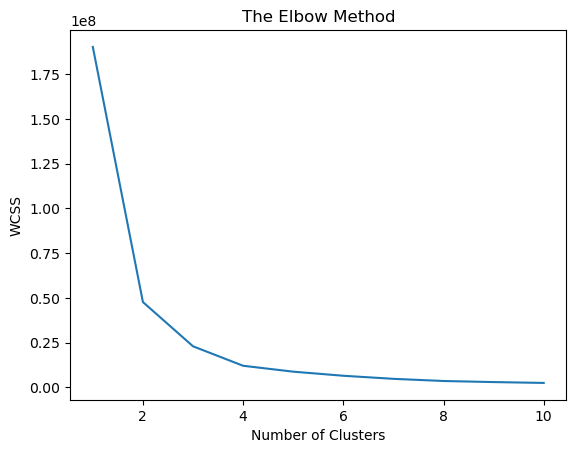

In [11]:
wcss = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

From the above figure we can choose 3 or 4 clusters

## Applying k-means to the cars dataset

In [12]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1])

## Plotting the result (based on two features)

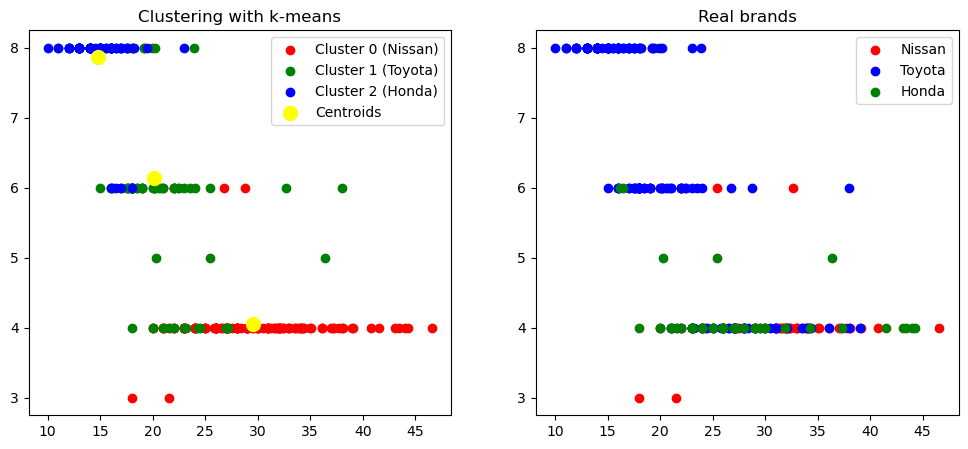

In [13]:
x1 = 0
x2 = 1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y_pred == 0, x1], X[y_pred == 0, x2], color="red", label="Cluster 0 (Nissan)")
plt.scatter(X[y_pred == 1, x1], X[y_pred == 1, x2], color="green", label="Cluster 1 (Toyota)")
plt.scatter(X[y_pred == 2, x1], X[y_pred == 2, x2], color="blue", label="Cluster 2 (Honda)")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="yellow", label="Centroids", s=100)
plt.title("Clustering with k-means")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[y == "Nissan", x1], X[y == "Nissan", x2], color="red", label="Nissan")
plt.scatter(X[y == "Toyota", x1], X[y == "Toyota", x2], color="blue", label="Toyota")
plt.scatter(X[y == "Honda", x1], X[y == "Honda", x2], color="green", label="Honda") 
plt.title("Real brands")
plt.legend()

plt.show()

## Evaluation with classification metrics


Classification Report:
              precision    recall  f1-score   support

       Honda       0.14      0.23      0.18        47
      Nissan       0.39      0.90      0.54        51
      Toyota       0.98      0.38      0.55       158

    accuracy                           0.46       256
   macro avg       0.51      0.51      0.42       256
weighted avg       0.71      0.46      0.48       256



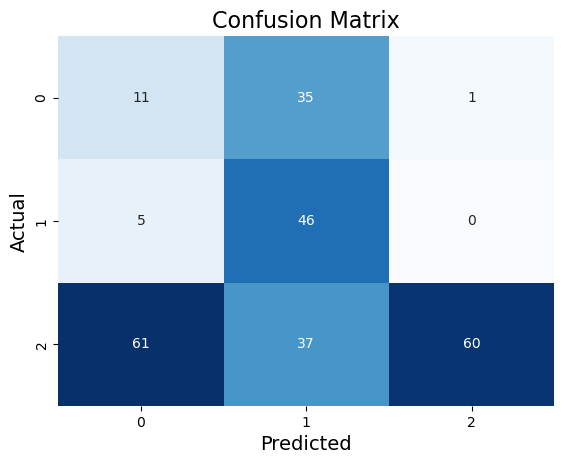

In [14]:
y_prediction = pd.Series(y_pred).map({1: "Honda", 0: "Nissan", 2: "Toyota"}).values
cm = confusion_matrix(y, y_prediction)
report = classification_report(y, y_prediction)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);